# Frequency translation without multiplication
Implementation of various examples inspired by book from Richard Lyons "Understanding Digital Signal Processing" Third Edition, chapter 13.1 "Frequency translation without multiplication".

## Frequency Translation by fs/2

In [347]:
import numpy as np
import matplotlib.pyplot as plt

In [348]:
# Define sample freq., number of samples, samples and time
fs=1e3
num_of_samples=500
samples=np.arange(num_of_samples)
t=(1/fs)*samples

In [349]:
# Generate 3 harmonic signals of different freq., amplitude and sum them
sig1=12*np.cos(2*np.pi*300*t-0.0*np.pi)
sig2=7*np.cos(2*np.pi*350*t-0.3*np.pi)
sig3=5*np.cos(2*np.pi*400*t-0.4*np.pi)
sig_in=sig1+sig2+sig3

In [350]:
#plt.plot(sig_in)

In [351]:
# Multiply the input signal by sequence -1,1,-1,1,... to create an output signal.
modulation_seq=((-1)**samples)
sig_out=modulation_seq*sig_in

In [352]:
sig_in_spectr=np.fft.fft(sig_in)
sig_out_spectr=np.fft.fft(sig_out)

In [353]:
#plt.plot(np.absolute(sig_in_spectr))

In [354]:
#plt.plot(np.absolute(sig_out_spectr))

In [355]:
#plt.plot(np.angle(sig_in_spectr))

In [356]:
#plt.plot(np.angle(sig_out_spectr))

In [357]:
#sig_out_spectr

The fft function results of analyzed signal has in place of expected zeros, values in order of e-12 or lower for both real and imag parts but not zeros.  These low values as they're both for real and imag parts corrupt the phase value of fft which is a random value in range -pi to pi.  To resolve this issue, if the magnitude (np.absolute) fft results below certain treshold values are cut to zero.

I was assumed that this fft function behavior is specific for NumPy, but I observed the same behavior for Octave fft function as well.

In [358]:
sig_in_spectr_lim = np.where(np.absolute(sig_in_spectr) < 1e-10, 0, sig_in_spectr)
sig_out_spectr_lim = np.where(np.absolute(sig_out_spectr) < 1e-10, 0, sig_out_spectr)

In [359]:
#sig_out_spectr_lim

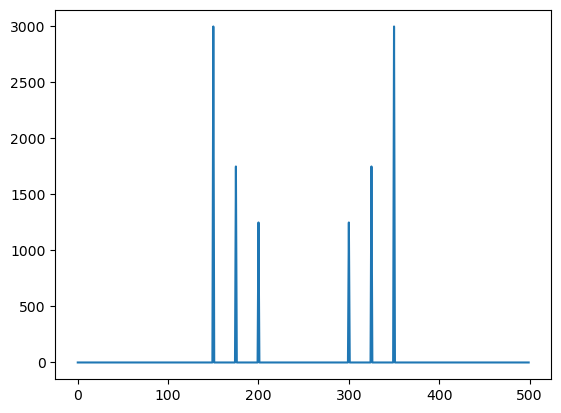

In [360]:
plt.plot(np.absolute(sig_in_spectr_lim))

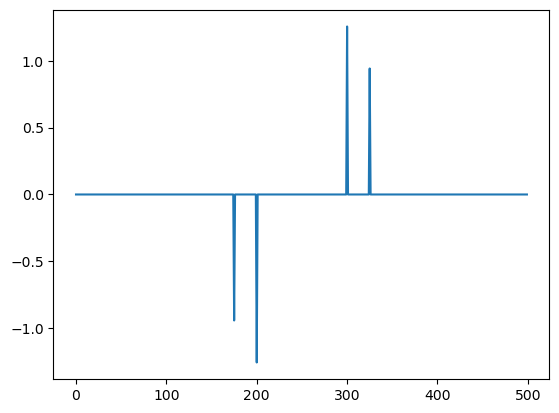

In [361]:
plt.plot(np.angle(sig_in_spectr_lim))

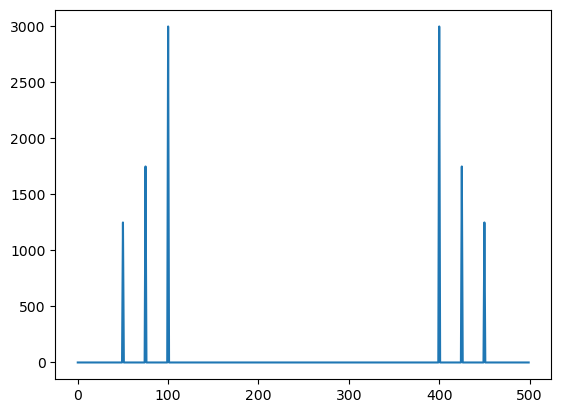

In [362]:
plt.plot(np.absolute(sig_out_spectr_lim))

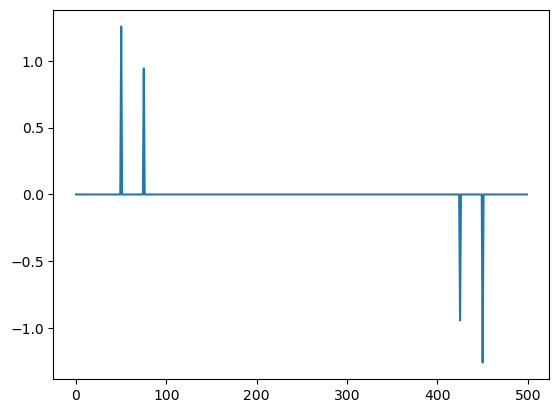

In [363]:
plt.plot(np.angle(sig_out_spectr_lim))

In [364]:
#plt.plot(sig1)